In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [10]:
toyato = pd.read_csv("ToyotaCorolla4.csv")
toyato.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,90,2000,3,5,210,1165
1,2,13750,23,10,2002,72937,90,2000,3,5,210,1165
2,3,13950,24,9,2002,41711,90,2000,3,5,210,1165
3,4,14950,26,7,2002,48000,90,2000,3,5,210,1165
4,5,13750,30,3,2002,38500,90,2000,3,5,210,1170


In [11]:
toyato.info

<bound method DataFrame.info of         Id  Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP    cc  Doors  \
0        1  13500         23         10      2002  46986   90  2000      3   
1        2  13750         23         10      2002  72937   90  2000      3   
2        3  13950         24          9      2002  41711   90  2000      3   
3        4  14950         26          7      2002  48000   90  2000      3   
4        5  13750         30          3      2002  38500   90  2000      3   
...    ...    ...        ...        ...       ...    ...  ...   ...    ...   
1431  1438   7500         69         12      1998  20544   86  1300      3   
1432  1439  10845         72          9      1998  19000   86  1300      3   
1433  1440   8500         71         10      1998  17016   86  1300      3   
1434  1441   7250         70         11      1998  16916   86  1300      3   
1435  1442   6950         76          5      1998      1  110  1600      5   

      Gears  Quarterly_Tax  Wei

In [12]:
toyato.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.117704,-0.130207,-0.043343,-0.240821,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.037387,-0.012069,-0.013063,0.031373,-0.002167
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.091892,0.151442,0.007766,0.193934,0.473478
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.012069,0.151442,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.043343,0.063104,-0.005364,-0.013063,0.007766,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613


In [14]:
toyato.isna().sum()

Id               0
Price            0
Age_08_04        0
Mfg_Month        0
Mfg_Year         0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

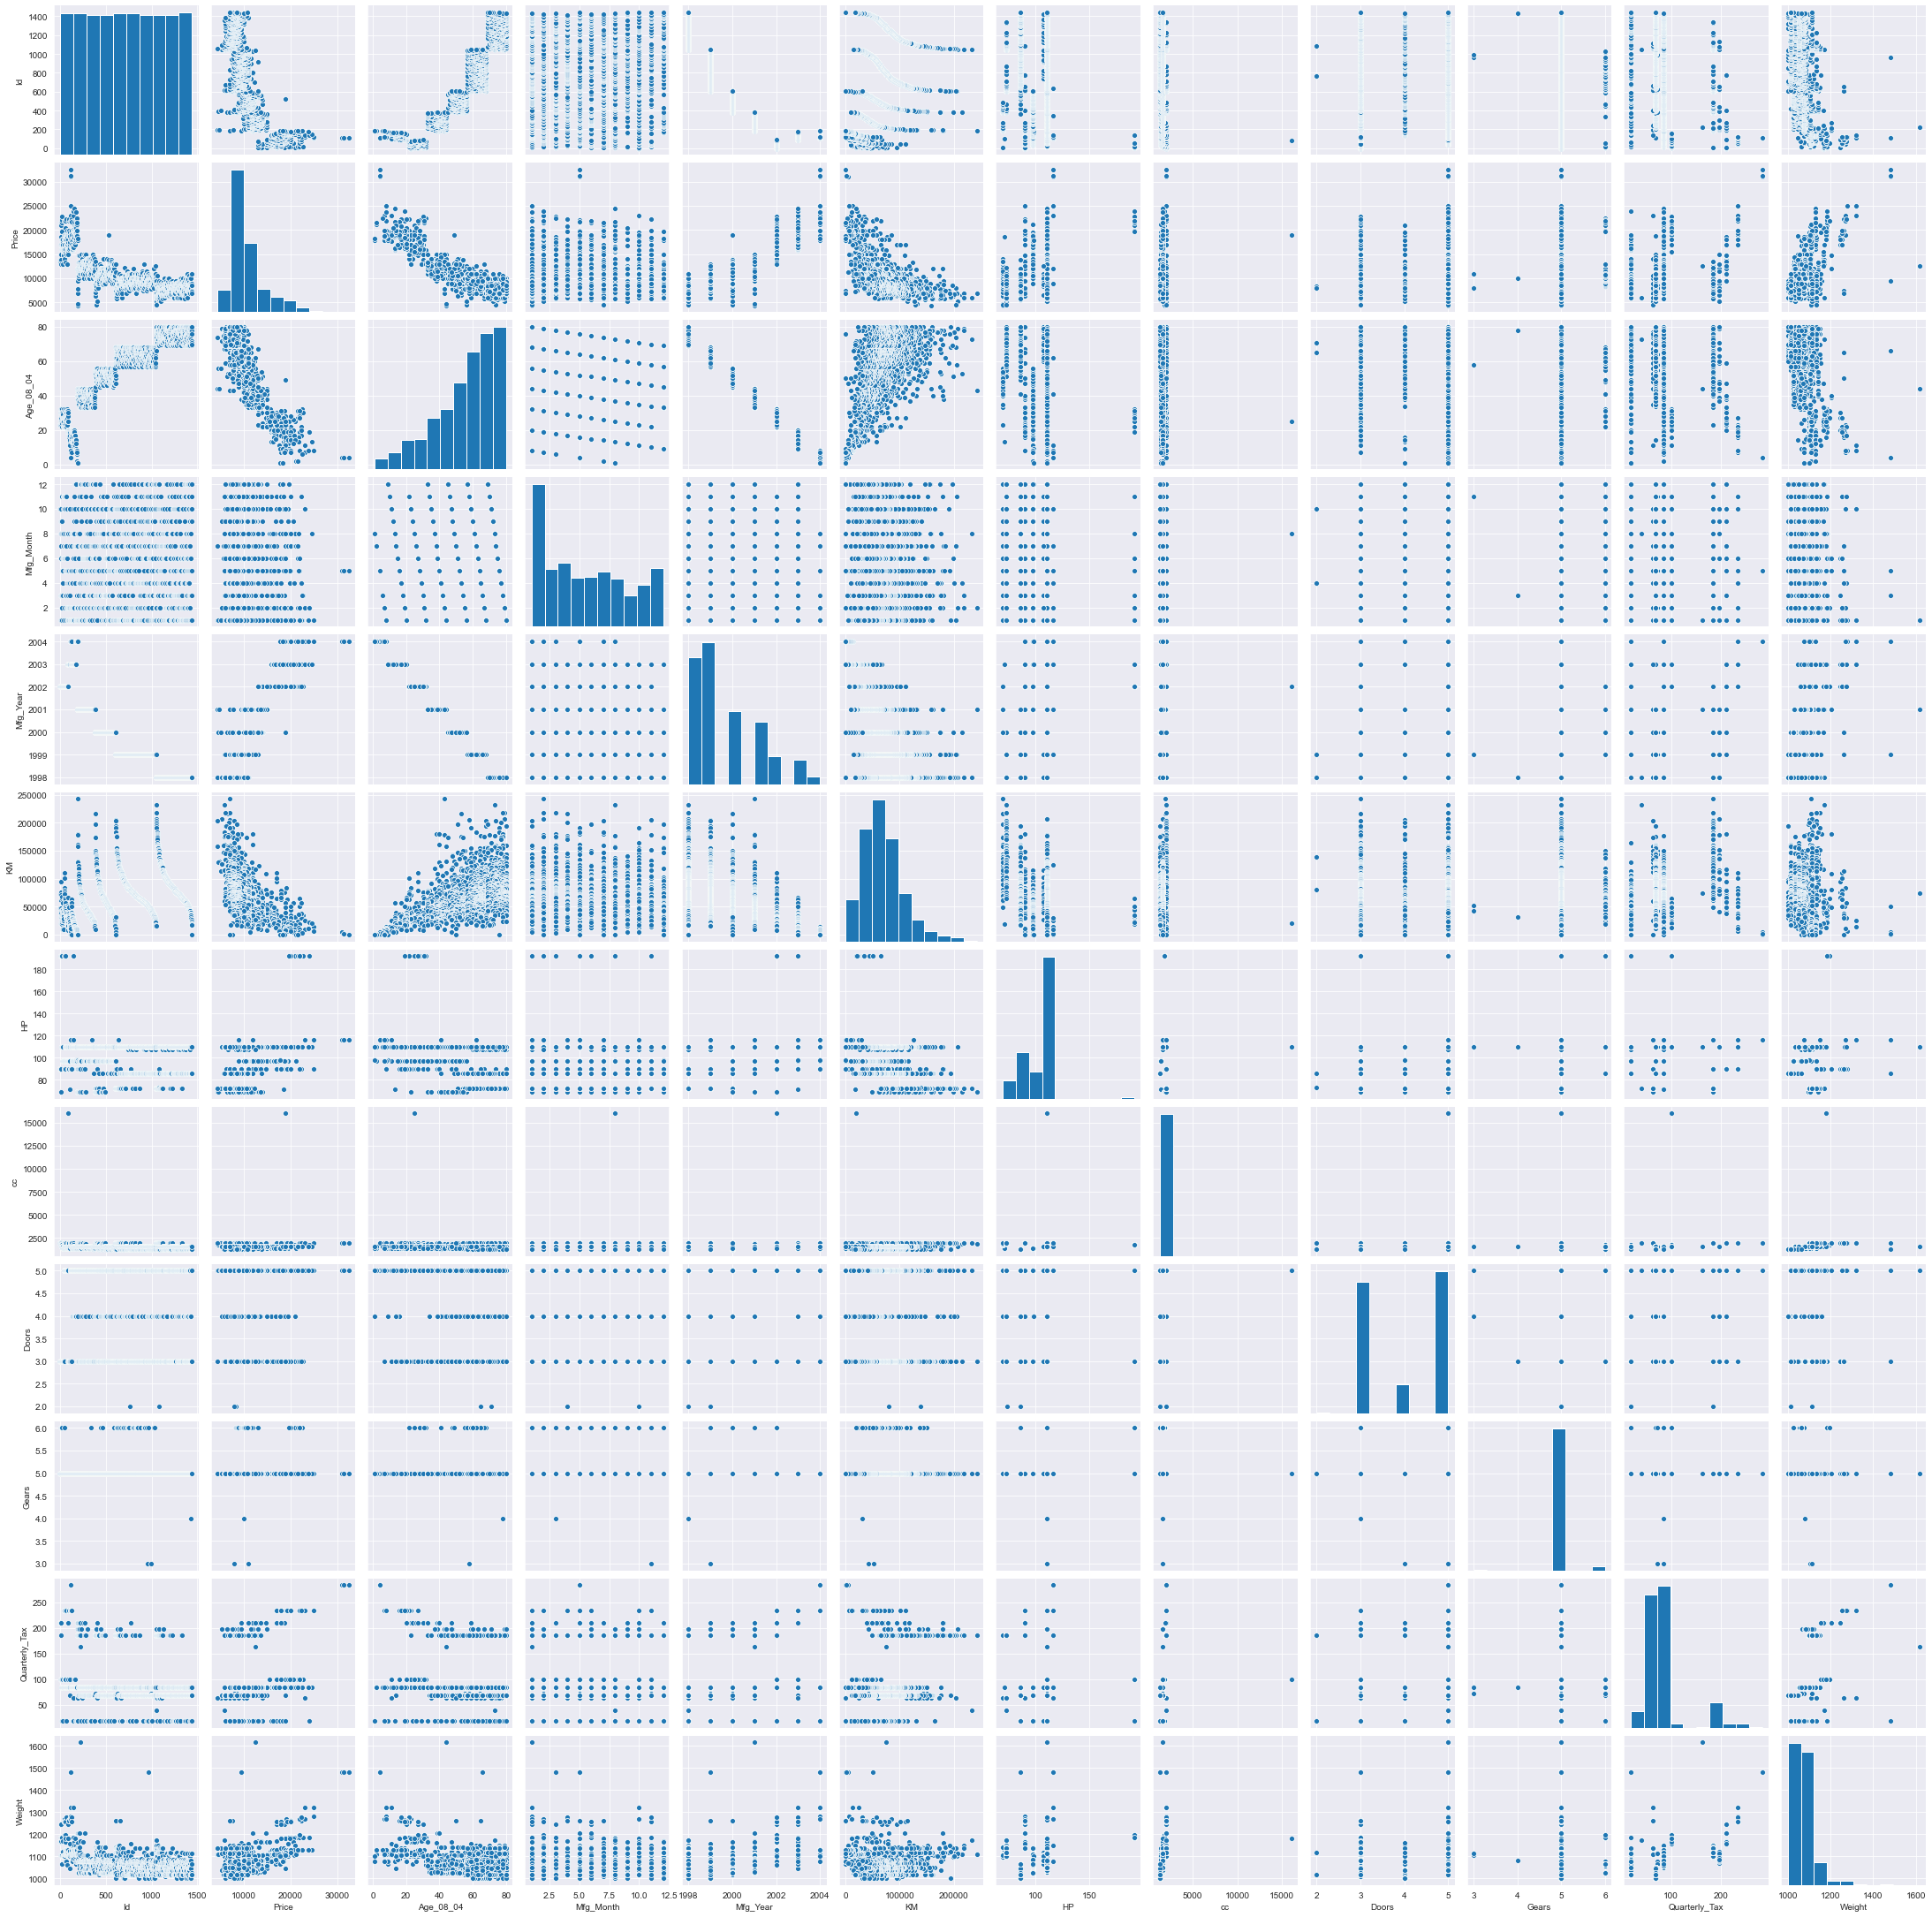

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(toyato)

In [21]:
import statsmodels.formula.api as smf 
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight"
,data=toyato).fit()

In [22]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [23]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:02:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
ml_v=smf.ols('Price~cc',data = toyato).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [28]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.55e-06
Time:                        11:11:11   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
ml_w=smf.ols('Price~Doors',data = toyato).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [31]:
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.46e-12
Time:                        11:14:11   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
ml_wv=smf.ols('Price~cc+Doors',data = toyato).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  
ml_wv.summary()

Intercept    12.620704
cc            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.15e-15
Time:                        11:15:08   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
rsq_Age_08_04 = smf.ols('Age_08_04~Mfg_Month+Mfg_Year+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_Mfg_Month = smf.ols('Mfg_Month~Age_08_04+Mfg_Year+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_Mfg_Month = 1/(1-rsq_Mfg_Month) 

rsq_Mfg_Year = smf.ols('Mfg_Year~Mfg_Month+Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyato).fit().rsquared  
vif_Mfg_Year = 1/(1-rsq_Mfg_Year) 

rsq_KM = smf.ols('KM~Mfg_Month+Age_08_04++HP+cc+Doors+Gears+Quarterly_Tax+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Mfg_Month+Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Mfg_Month+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Mfg_Month+Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)


rsq_Gears = smf.ols('Gears~Mfg_Month+Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Mfg_Month+Age_08_04+KM+HP+cc+Doors+Gears+Weight+Mfg_Year',data=toyato).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols('Weight~Mfg_Month+Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Mfg_Year',data=toyato).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight)

# Storing vif values in a data frame
d1 = {'Variables':["Age_08_04","Mfg_Month","Mfg_Year","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],'VIF':[vif_Age_08_04,vif_Mfg_Month,vif_Mfg_Year,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-39-fc24c0db370e>:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Age_08_04 = 1/(1-rsq_Age_08_04)
<ipython-input-39-fc24c0db370e>:5: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Mfg_Month = 1/(1-rsq_Mfg_Month)
<ipython-input-39-fc24c0db370e>:8: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Mfg_Year = 1/(1-rsq_Mfg_Year)


,Variables,VIF
0,Age_08_04,inf
1,Mfg_Month,inf
2,Mfg_Year,inf
3,KM,1.760145
4,HP,1.420428
5,cc,1.166106
6,Doors,1.156632
7,Gears,1.098781
8,Quarterly_Tax,2.312513
9,Weight,2.533462


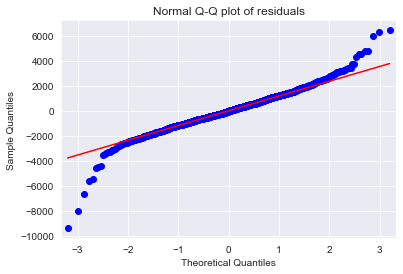

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid>5))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [42]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

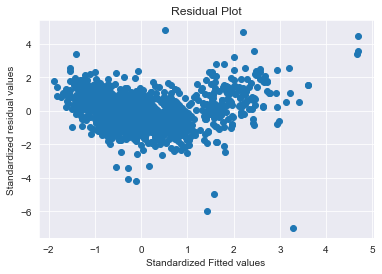

In [43]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

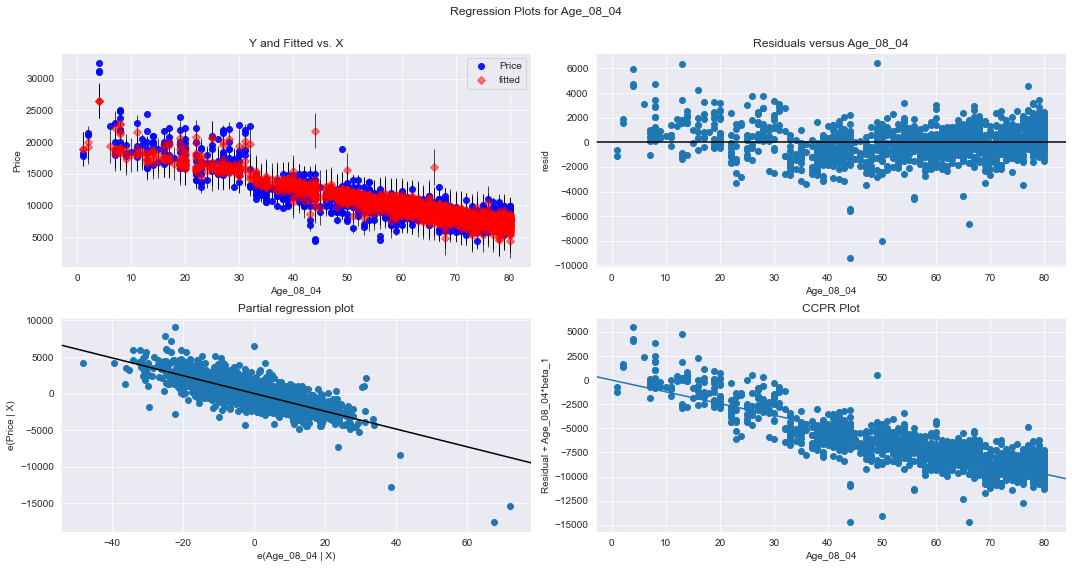

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

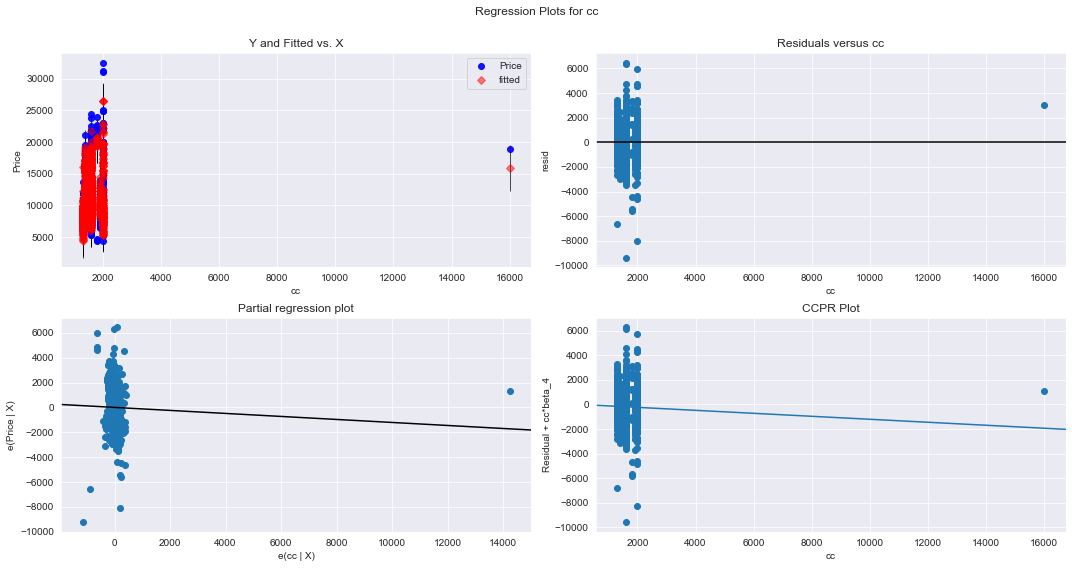

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

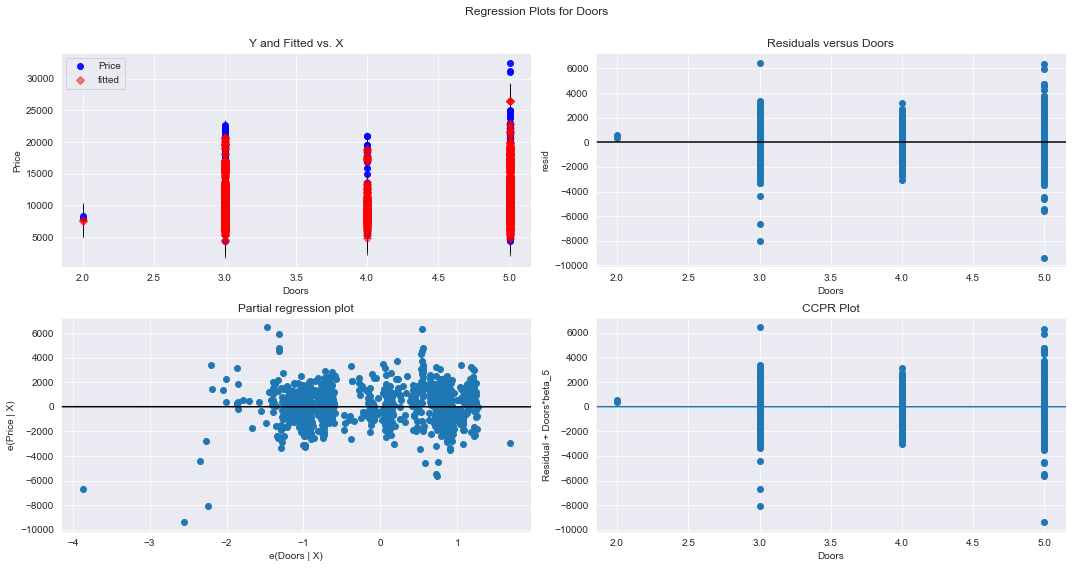

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

In [49]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-64-8c0dc0671a49>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyato)), np.round(c, 3))


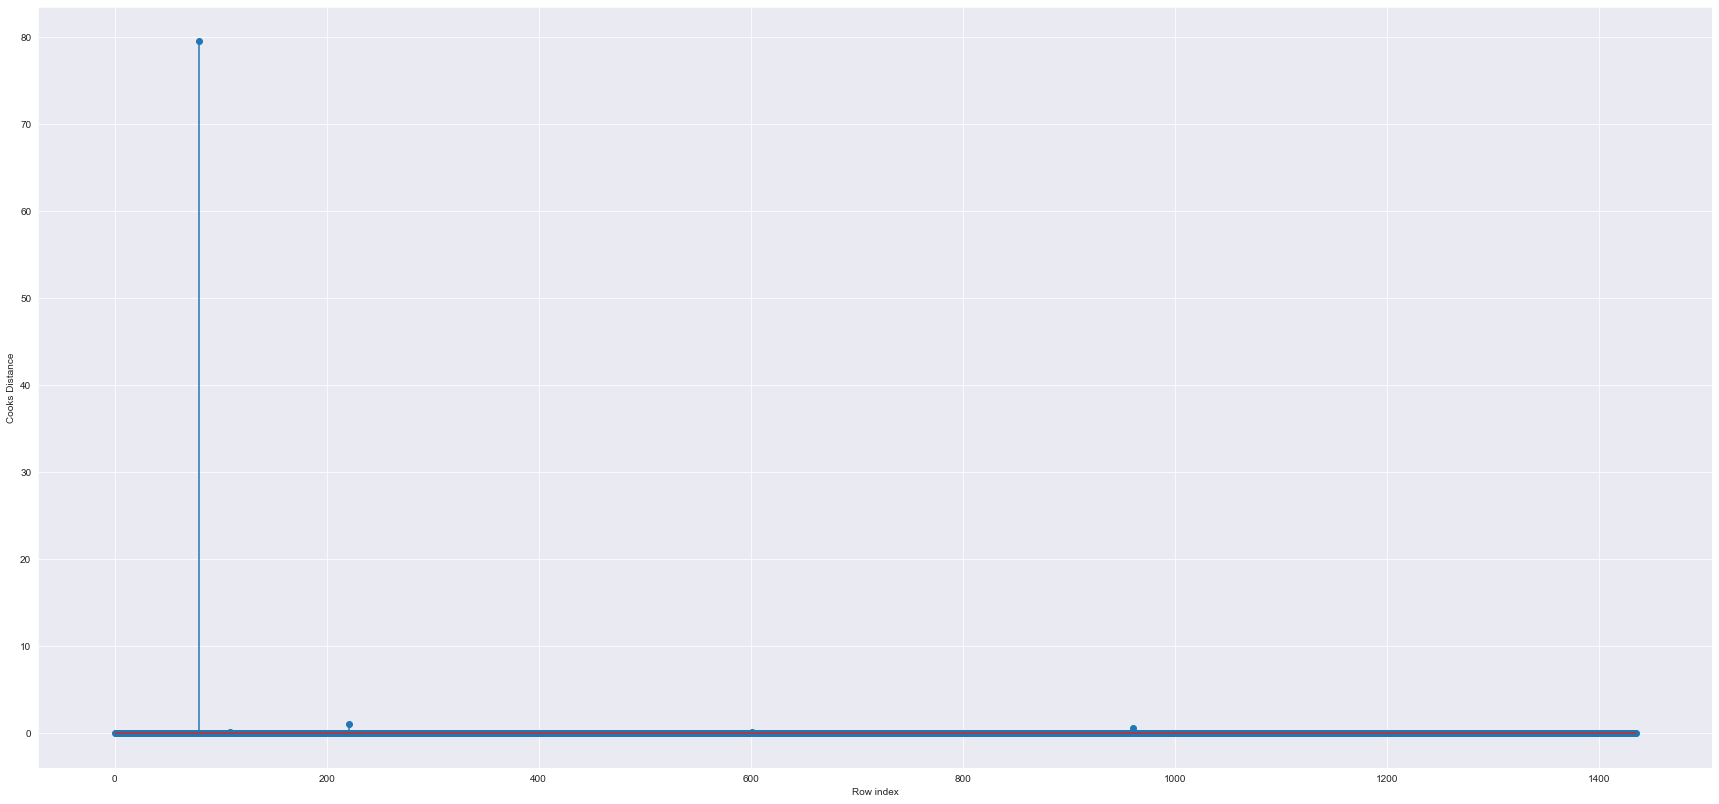

In [64]:
fig = plt.subplots(figsize=(30, 14))
plt.stem(np.arange(len(toyato)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
(np.argmax(c),np.max(c))

(80, 79.52010624139518)

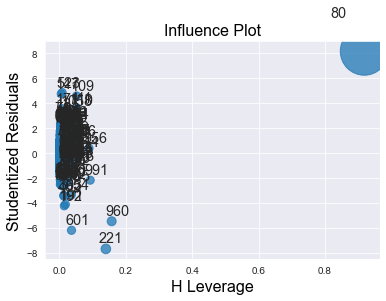

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
k = toyato.shape[1]
n = toyato.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.027158774373259052

In [75]:
cars[cars.index.isin([ 80])]

,HP,MPG,VOL,SP,WT
80,236,12.101263,107,139.840817,34.948615


In [72]:
toyato.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,90,2000,3,5,210,1165
1,2,13750,23,10,2002,72937,90,2000,3,5,210,1165
2,3,13950,24,9,2002,41711,90,2000,3,5,210,1165
3,4,14950,26,7,2002,48000,90,2000,3,5,210,1165
4,5,13750,30,3,2002,38500,90,2000,3,5,210,1170


In [77]:
toyato_new = pd.read_csv("ToyotaCorolla4.csv")

In [78]:
toyato1=toyato_new.drop(toyato_new.index[[80]],axis=0).reset_index()
toyato1 

,index,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,1,13500,23,10,2002,46986,90,2000,3,5,210,1165
1,1,2,13750,23,10,2002,72937,90,2000,3,5,210,1165
2,2,3,13950,24,9,2002,41711,90,2000,3,5,210,1165
3,3,4,14950,26,7,2002,48000,90,2000,3,5,210,1165
4,4,5,13750,30,3,2002,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,7500,69,12,1998,20544,86,1300,3,5,69,1025
1431,1432,1439,10845,72,9,1998,19000,86,1300,3,5,69,1015
1432,1433,1440,8500,71,10,1998,17016,86,1300,3,5,69,1015
1433,1434,1441,7250,70,11,1998,16916,86,1300,3,5,69,1015


In [79]:
toyato1=toyato1.drop(['index'],axis=1)

In [80]:
toyato1

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1,13500,23,10,2002,46986,90,2000,3,5,210,1165
1,2,13750,23,10,2002,72937,90,2000,3,5,210,1165
2,3,13950,24,9,2002,41711,90,2000,3,5,210,1165
3,4,14950,26,7,2002,48000,90,2000,3,5,210,1165
4,5,13750,30,3,2002,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,12,1998,20544,86,1300,3,5,69,1025
1431,1439,10845,72,9,1998,19000,86,1300,3,5,69,1015
1432,1440,8500,71,10,1998,17016,86,1300,3,5,69,1015
1433,1441,7250,70,11,1998,16916,86,1300,3,5,69,1015


In [83]:
final_ml_V= smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = toyato1).fit()

In [84]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8725130820761395, 24652.43079897833)

In [85]:
final_ml_W= smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = toyato1).fit()

In [86]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8774284044069148, 24596.008835086788)

In [87]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

<ipython-input-88-4b2985486f58>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyato1)),np.round(c_V,3));


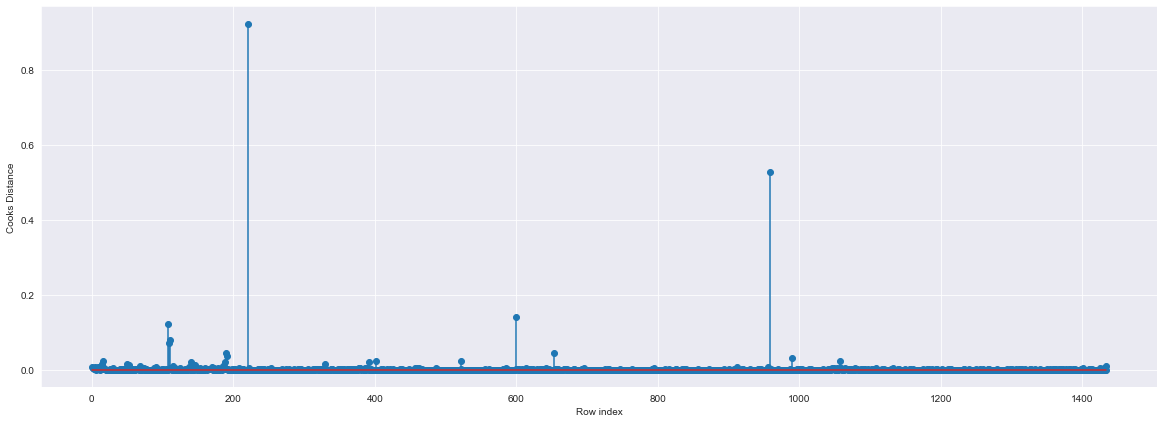

In [88]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyato1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [89]:
(np.argmax(c_V),np.max(c_V)) # hence the value is <1 therefore proceed for prediction

(220, 0.9232891216707199)

In [90]:
final_ml_V= smf.ols('Price~Age_08_04+Mfg_Month+Mfg_Year+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data = toyato1).fit()

In [91]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8725130820761395, 24652.43079897833)

In [92]:
new_data=pd.DataFrame({"ToyotaCorolla4.csv"},index=[1])

In [96]:
final_ml_V.predict(toyato1)

0       16447.644865
1       15919.689882
2       16534.988720
3       16367.098728
4       16559.882283
            ...     
1430     8068.883183
1431     7881.573694
1432     7941.909127
1433     7963.915896
1434    10283.716975
Length: 1435, dtype: float64

In [97]:
pred_y = final_ml_V.predict(toyato_new)

In [98]:
pred_y

0       16447.644865
1       15919.689882
2       16534.988720
3       16367.098728
4       16559.882283
            ...     
1431     8068.883183
1432     7881.573694
1433     7941.909127
1434     7963.915896
1435    10283.716975
Length: 1436, dtype: float64

In [99]:
pd.options.display.max_rows = 1435

In [100]:
pred_y 

0       16447.644865
1       15919.689882
2       16534.988720
3       16367.098728
4       16559.882283
            ...     
1431     8068.883183
1432     7881.573694
1433     7941.909127
1434     7963.915896
1435    10283.716975
Length: 1436, dtype: float64